In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./dataset/house.csv')

## Data Exploration

In [6]:
print(data.shape)
data.head(5)

(4045, 7)


,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


In [15]:
data.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.00000,4045.000000,4045.000000
mean,3.649691,111.628225,1007.115236,89.412340,9.55822,48.360198,95733.956499
std,2.465720,89.459307,578.706749,71.000440,7.70210,28.153029,3770.581749
min,1.000000,-8.499109,10.060000,-168.492932,1.00000,0.000000,84153.485790
25%,2.000000,50.168622,510.630000,39.283508,2.00000,24.000000,93199.037388
50%,3.000000,86.381463,1009.410000,89.031988,8.00000,48.000000,95474.254973
75%,5.000000,144.767416,1493.410000,140.493035,16.00000,72.000000,97863.622299
max,17.000000,750.971604,1999.840000,330.275317,24.00000,97.000000,118134.771190


In [9]:
data.isnull().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [10]:
data.duplicated().sum()

0

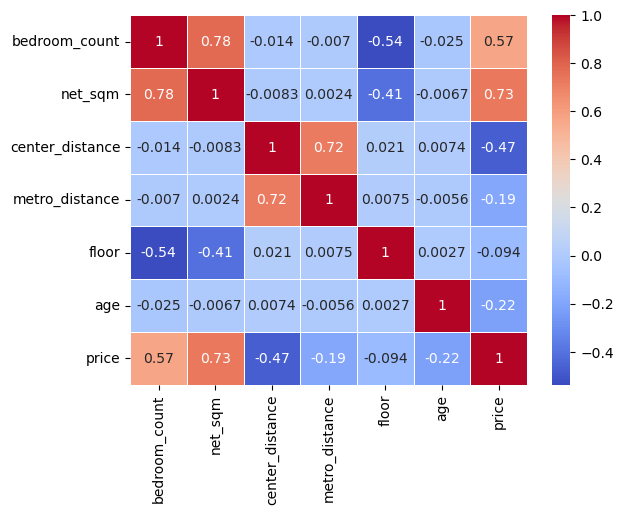

In [22]:
correlation = data.corr()
sns.heatmap(correlation, cmap = 'coolwarm', annot=True, linewidths=0.5)
plt.show()

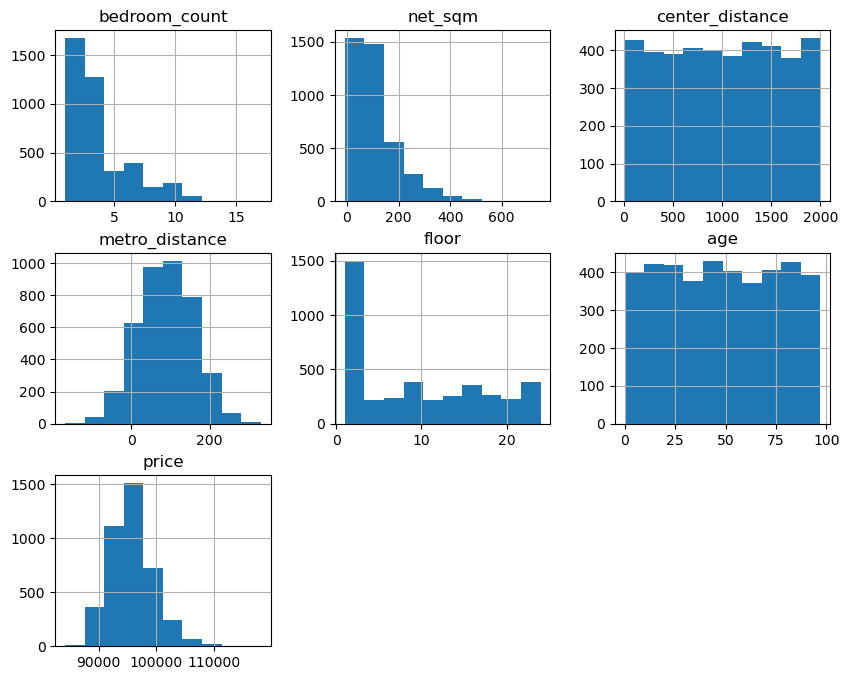

In [24]:
data.hist(figsize=(10,8))
plt.show()

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


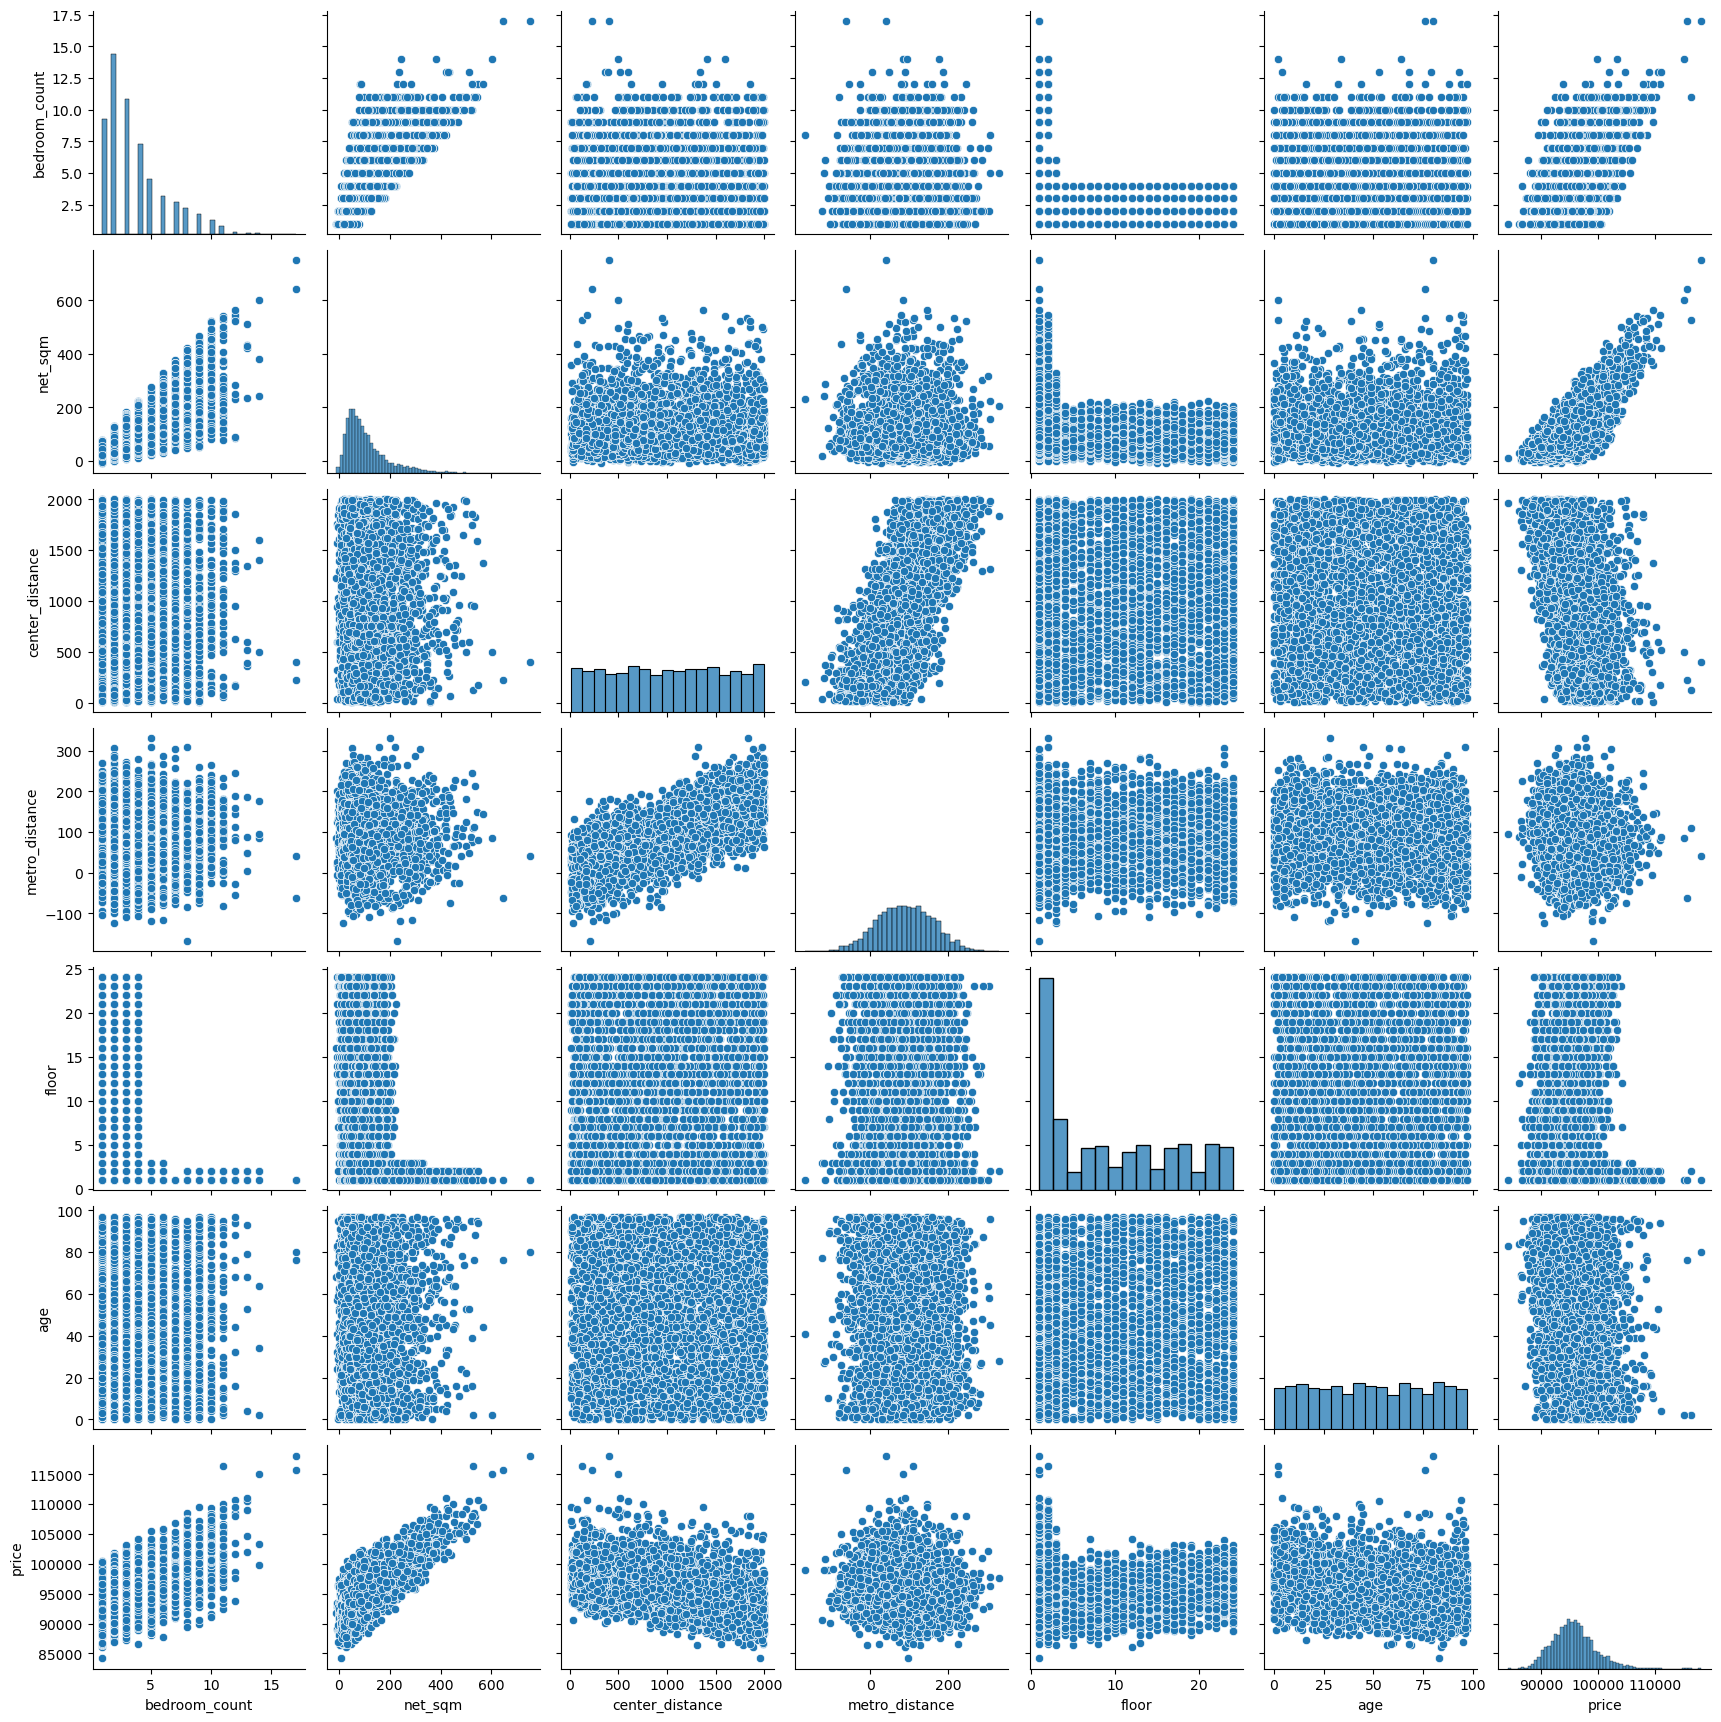

In [26]:
sns.pairplot(data)
plt.show()

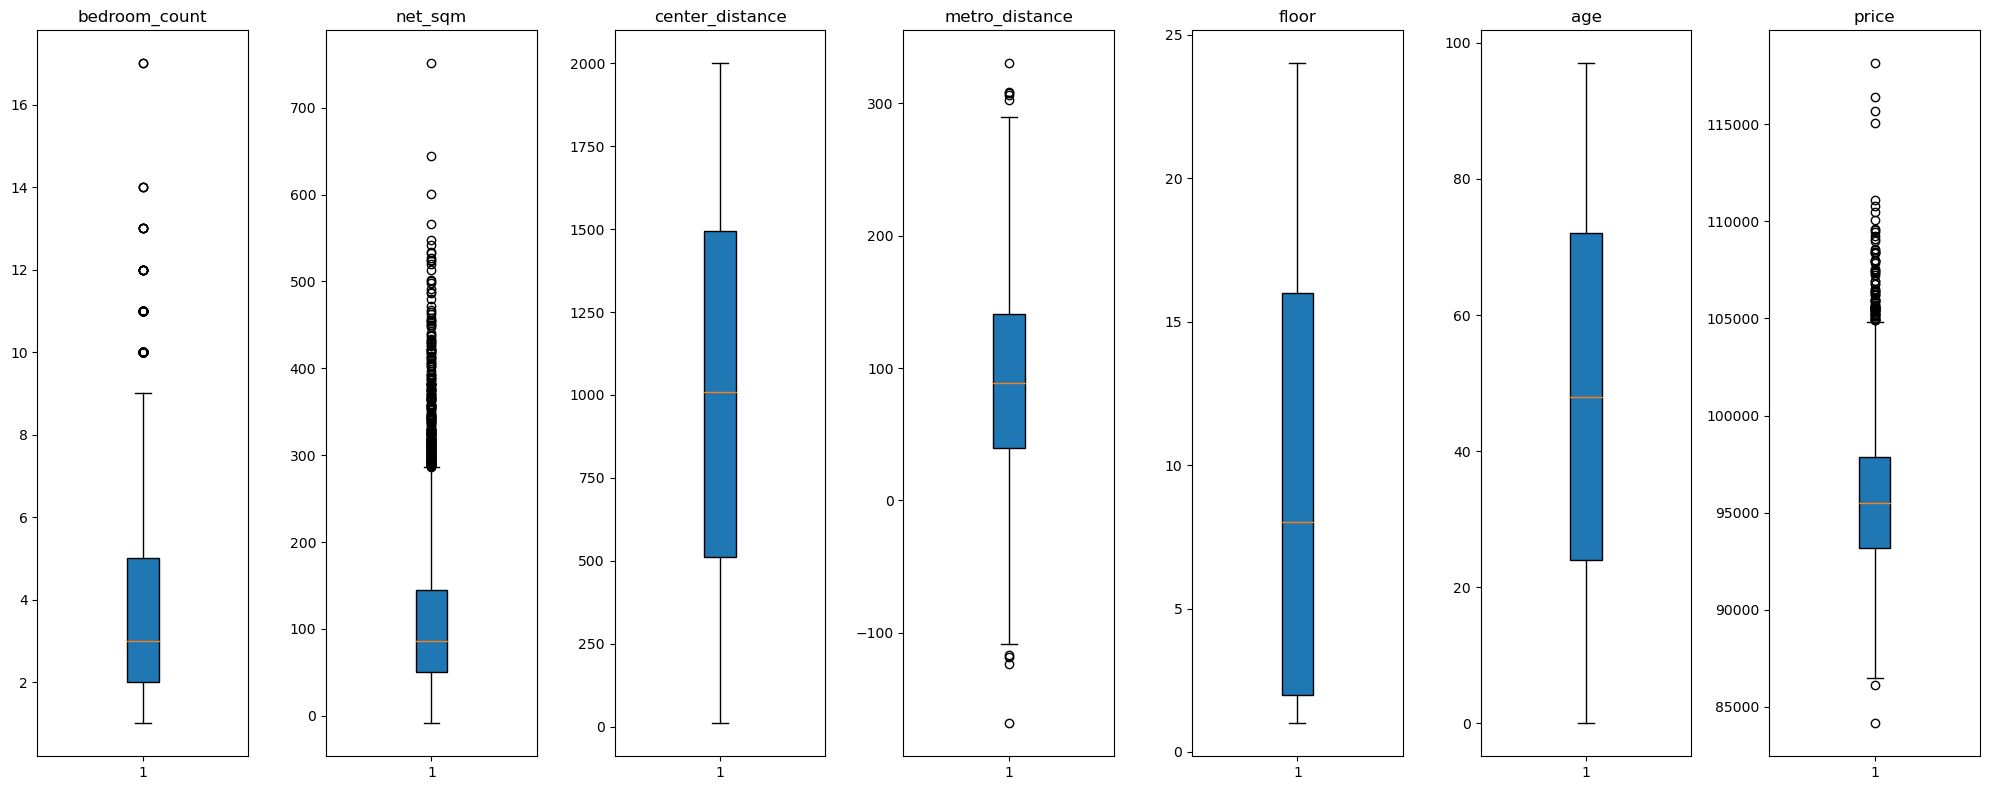

In [28]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(data.columns):
    plt.subplot(1, len(data.columns), i + 1)
    plt.boxplot(data[column], vert=True, patch_artist=True)
    plt.title(column)
plt.tight_layout()
plt.show()

## Detect Outlier

In [32]:
column_name = 'price'
l = 0.05
h = 1 -l
Q1 = data[column_name].quantile(l)
Q3 = data[column_name].quantile(h)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
within_range_mask = (data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)
data_within_range = data[within_range_mask]
num_removed_data_points = data.shape[0] - data_within_range.shape[0]
print("Number of outlier data points:"+"\033[0m", num_removed_data_points)

Number of outlier data points: 0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
data.head(5)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [38]:
X = data.iloc[:,:-1]
y = data['price'].values

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [49]:
models = [
    ('Linear Regression', LinearRegression()),
    ('SVM Regression', SVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('XGBoost Regression', xgb.XGBRegressor()),
    ('LightGBM Regression', lgb.LGBMRegressor()),
] 
results = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append({"Model": model_name, "MSE": mse})
results_df = pd.DataFrame(results).sort_values(by="MSE", ascending=False)

In [50]:
results_df.head()

,Model,MSE
1,SVM Regression,1.359299e+07
2,Decision Tree,3.675194e+06
3,XGBoost Regression,1.962219e+06
4,LightGBM Regression,1.811426e+06
0,Linear Regression,1.448947e+06
